In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import os
import scipy.stats as sp


In [2]:
csv_path = os.path.join("..", "Resources", "openpowerlifting-2020-09-06.csv")
powerlifting_base = pd.read_csv(csv_path)
print(type(powerlifting_base))

powerlifting_base.head()

#powerlifting_base.drop_duplicates()
#powerlifting_base.info()


C:\Users\j1-ag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (34,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Goodlift,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Tucker Sanders,M,B,Single-ply,15.0,13-15,14-18,Teen 14-15,52.0,52,...,49.90,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ft. Worth,Ronnie Coleman Classic
1,Xander Womack,M,B,Single-ply,14.0,13-15,14-18,Teen 14-15,100.0,100,...,51.67,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ft. Worth,Ronnie Coleman Classic
2,Michael Womack III,M,B,Single-ply,16.0,16-17,14-18,Teen 16-17,67.5,67.5,...,46.65,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ft. Worth,Ronnie Coleman Classic
3,Logan McCurley,M,B,Single-ply,16.0,16-17,14-18,Teen 16-17,75.0,75,...,45.24,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ft. Worth,Ronnie Coleman Classic
4,Emily Jondron,F,B,Single-ply,21.0,20-23,19-23,Juniors 20-25,90.0,90,...,81.45,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ft. Worth,Ronnie Coleman Classic


In [3]:
#number of unique values

unique_counts = pd.DataFrame.from_records([(col, powerlifting_base[col].nunique()) for col in powerlifting_base.columns],
                                         columns = ['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
31,Tested,1
1,Sex,3
3,Equipment,6
2,Event,7
6,BirthYearClass,7
5,AgeClass,16
34,ParentFederation,21
36,MeetCountry,109
26,Place,125
37,MeetState,172


In [4]:
#change the Dtypes of some columns

powerlifting_base['Age'] = powerlifting_base['Age'].astype('float32')
powerlifting_base['Federation'] = powerlifting_base['Federation'].astype('category')
powerlifting_base['Equipment'] = powerlifting_base['Equipment'].astype('category')
powerlifting_base['Sex'] = powerlifting_base['Sex'].astype('category')
powerlifting_base['AgeClass'] = powerlifting_base['AgeClass'].astype('category')
powerlifting_base['Event'] = powerlifting_base['Event'].astype('category')
powerlifting_base['Country'] = powerlifting_base['Country'].astype('category')
powerlifting_base['MeetCountry'] = powerlifting_base['MeetCountry'].astype('category')
powerlifting_base.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040684 entries, 0 to 2040683
Data columns (total 40 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Name              object  
 1   Sex               category
 2   Event             category
 3   Equipment         category
 4   Age               float32 
 5   AgeClass          category
 6   BirthYearClass    object  
 7   Division          object  
 8   BodyweightKg      float64 
 9   WeightClassKg     object  
 10  Squat1Kg          float64 
 11  Squat2Kg          float64 
 12  Squat3Kg          float64 
 13  Squat4Kg          float64 
 14  Best3SquatKg      float64 
 15  Bench1Kg          float64 
 16  Bench2Kg          float64 
 17  Bench3Kg          float64 
 18  Bench4Kg          float64 
 19  Best3BenchKg      float64 
 20  Deadlift1Kg       float64 
 21  Deadlift2Kg       float64 
 22  Deadlift3Kg       float64 
 23  Deadlift4Kg       float64 
 24  Best3DeadliftKg   float64 
 25  TotalKg           

In [5]:
#create cleaner table
columns = ['Equipment', 'Age', 'Country', 'Division', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'TotalKg', 'Place', 'Sex']
powerlifting_base = powerlifting_base[columns]
powerlifting_base.head()

,Equipment,Age,Country,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3DeadliftKg,Best3BenchKg,TotalKg,Place,Sex
0,Single-ply,15.0,USA,Teen 14-15,52.0,52,NaN,NaN,85.0,85.0,1,M
1,Single-ply,14.0,USA,Teen 14-15,100.0,100,NaN,NaN,162.5,162.5,1,M
2,Single-ply,16.0,USA,Teen 16-17,67.5,67.5,NaN,NaN,110.0,110.0,1,M
3,Single-ply,16.0,USA,Teen 16-17,75.0,75,NaN,NaN,117.5,117.5,1,M
4,Single-ply,21.0,USA,Juniors 20-25,90.0,90,NaN,NaN,160.0,160.0,1,F


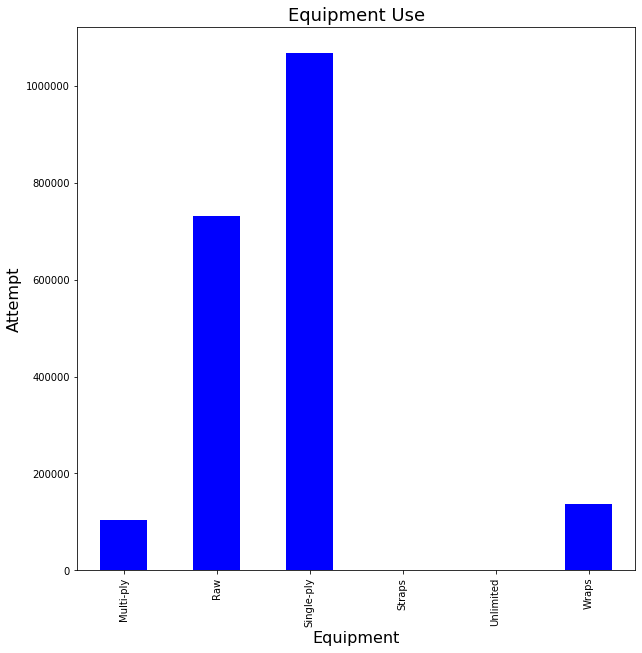

In [6]:
bar_data = powerlifting_base.groupby('Equipment').count()['Sex']
ax = bar_data.plot.bar(figsize=(10,10), width=.5, color='blue')


ax.set_title(f"Equipment Use", fontsize = 18)
ax.set_xlabel("Equipment", fontsize = 16)
ax.set_ylabel("Attempt", fontsize = 16)

plt.savefig("../extra visualizations/equipment_use.png")

In [7]:
powerlifting_base.groupby(['Equipment'])['BodyweightKg', 'TotalKg'].mean()

C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BodyweightKg,TotalKg
Equipment,,
Multi-ply,95.356168,405.584386
Raw,84.364439,326.289542
Single-ply,82.390104,412.569068
Straps,95.953784,319.854615
Unlimited,98.256237,277.173692
Wraps,89.309776,516.949555


C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


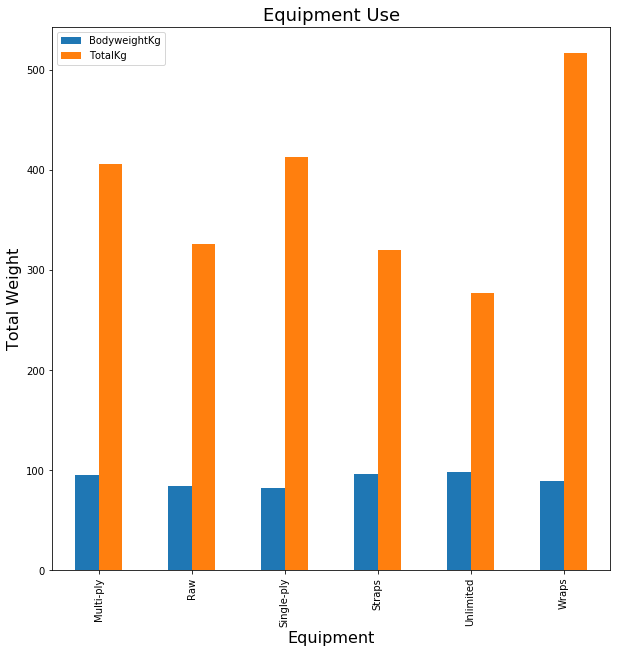

In [8]:
bargr = powerlifting_base.groupby(['Equipment'])['BodyweightKg', 'TotalKg'].mean()
ax = bargr.plot.bar(figsize=(10,10), stacked=False)
ax.set_title(f"Equipment Use", fontsize = 18)
ax.set_xlabel("Equipment", fontsize = 16)
ax.set_ylabel("Total Weight", fontsize = 16)

plt.savefig("../extra visualizations/equipment_use2.png")

C:\Users\j1-ag\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\j1-ag\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


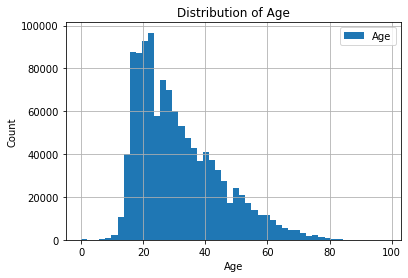

In [9]:
#histograph for age of comp

plt.hist(powerlifting_base["Age"], bins=50, label="Age")
plt.ylabel('Count')
plt.xlabel('Age')
plt.title(f"Distribution of Age")
plt.grid(zorder=0)
plt.legend(loc="upper right")

plt.savefig("../extra visualizations/age.png")
plt.show()

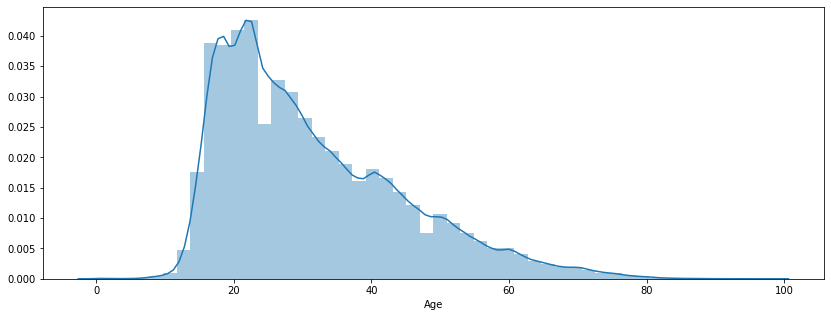

In [10]:
#dropna() - is it deleting rows and columns that have NaN
fig=plt.figure(figsize=(14,5))
sns.distplot(powerlifting_base['Age'].dropna(), kde=True)
plt.savefig("../extra visualizations/histowline.png")

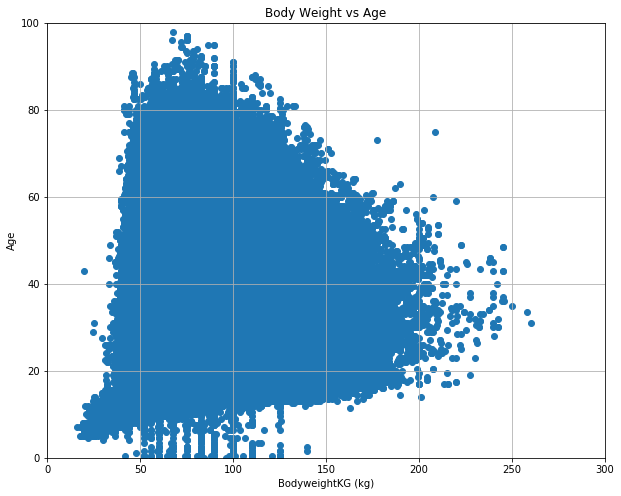

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(powerlifting_base['BodyweightKg'], powerlifting_base['Age'])
plt.ylabel('Age')
plt.xlabel('BodyweightKG (kg)')
plt.title('Body Weight vs Age')
plt.xlim(0, 300)
plt.ylim(0,100)
plt.grid()
plt.savefig("../extra visualizations/scatter1.png")
plt.show()

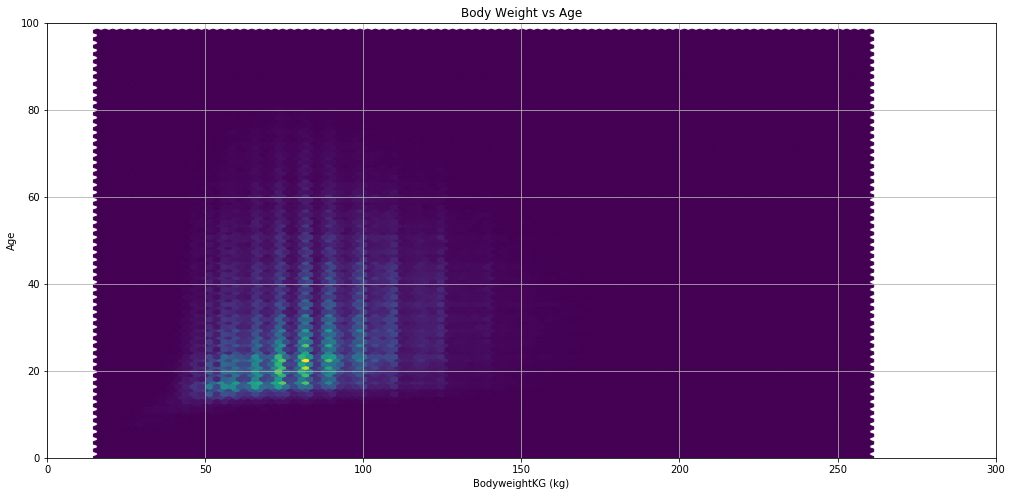

In [12]:
plt.figure(figsize=(17,8))
plt.hexbin(powerlifting_base['BodyweightKg'], powerlifting_base['Age'])
plt.ylabel('Age')
plt.xlabel('BodyweightKG (kg)')
plt.title('Body Weight vs Age')
plt.xlim(0, 300)
plt.ylim(0,100)
plt.grid()
plt.savefig("../extra visualizations/hexbin.png")
plt.show()

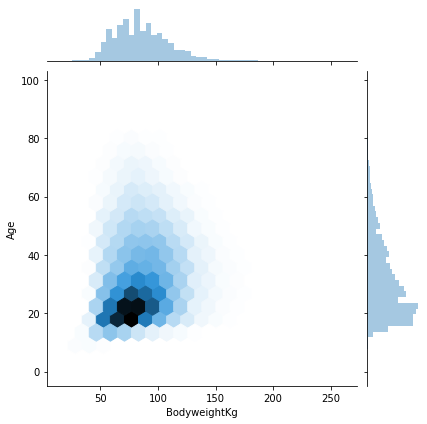

In [13]:
#Analog scatterplot is jointplot in seaborn
sns.jointplot(x='BodyweightKg', y='Age', data=powerlifting_base, kind='hex', gridsize=20)
plt.savefig("../extra visualizations/hexbin2.png")

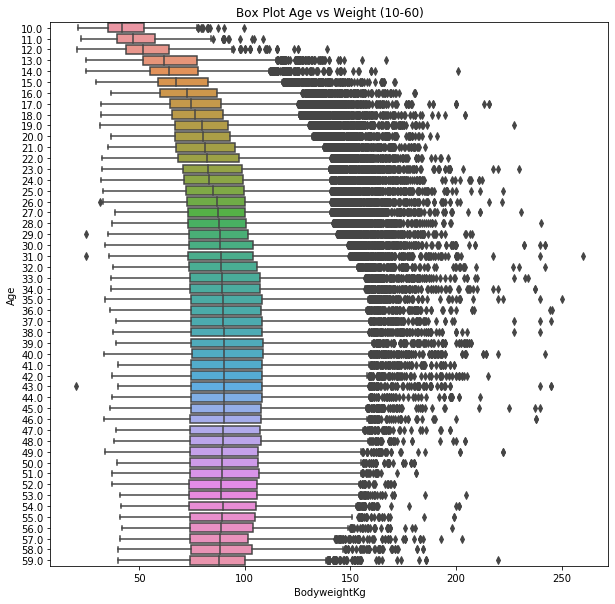

In [14]:
#Useful thing: inter-quantile percentile plot
fig=plt.figure(figsize=(10,10))
sns.boxplot(y='Age', x='BodyweightKg', data=powerlifting_base[powerlifting_base.Age.isin(np.arange(10,60,1))], orient='h')
plt.title('Box Plot Age vs Weight (10-60)')
plt.savefig("../extra visualizations/boxplot.png")

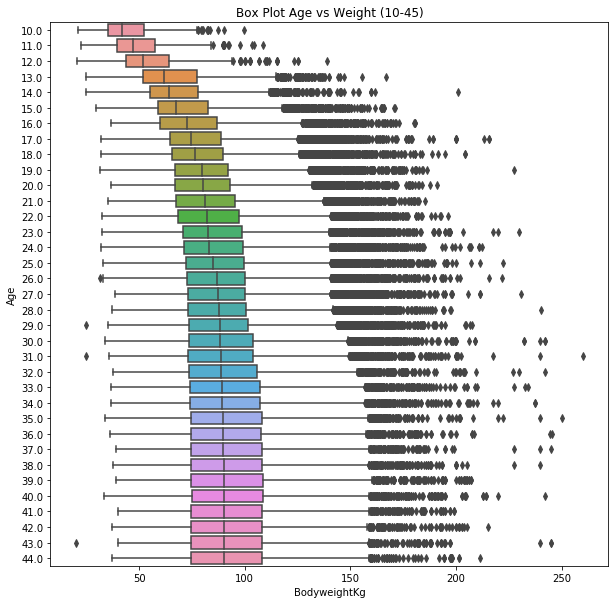

In [15]:
#Useful thing: inter-quantile percentile plot
fig=plt.figure(figsize=(10,10))
sns.boxplot(y='Age', x='BodyweightKg', data=powerlifting_base[powerlifting_base.Age.isin(np.arange(10,45,1))], orient='h')
plt.title('Box Plot Age vs Weight (10-45)')
plt.savefig("../extra visualizations/boxplot2.png")

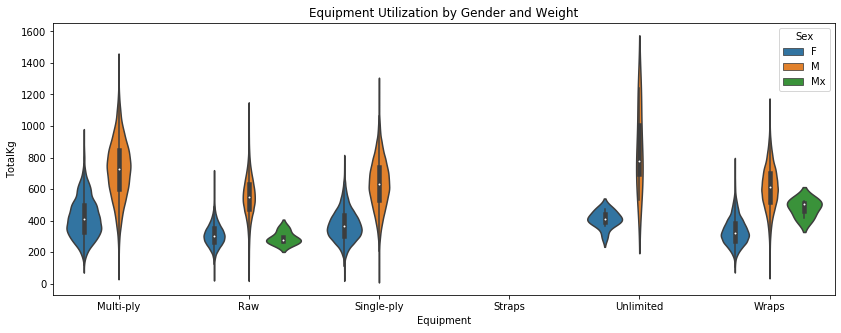

In [51]:
#Bimodal distribution
fig=plt.figure(figsize=(14,5))
sns.violinplot(y='TotalKg', x='Equipment', hue='Sex', split=False, data=powerlifting_base)
plt.title('Equipment Utilization by Gender and Weight')
plt.savefig("../extra visualizations/violin.png")

<Figure size 360x360 with 0 Axes>

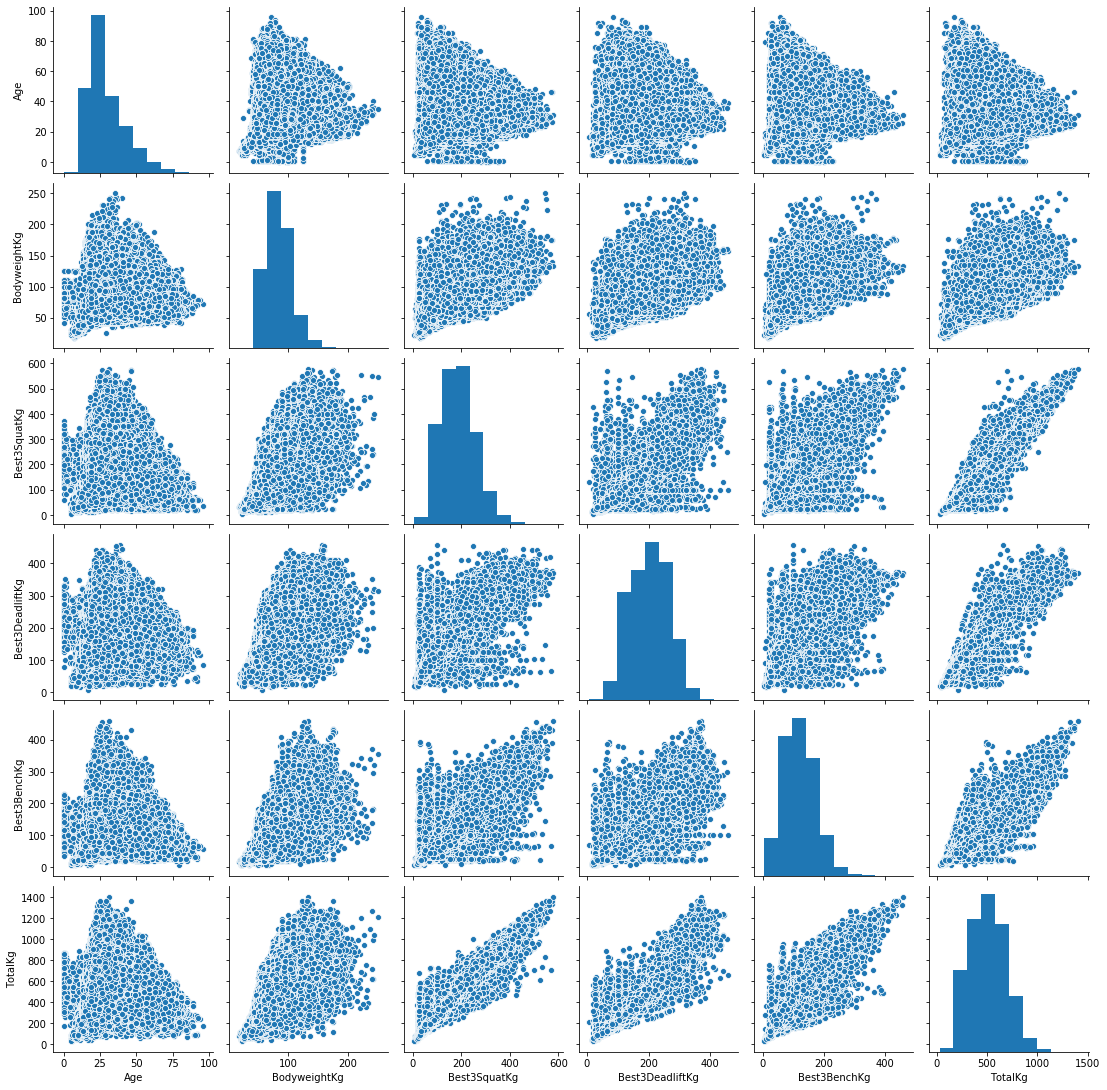

In [17]:
#Pairwise dependencies
fig=plt.figure(figsize=(5,5))
cols=['Equipment','Age', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg', 'Place', 'TotalKg', 'Sex']
sns_plot=sns.pairplot(powerlifting_base[cols].dropna())
plt.savefig("../extra visualizations/scatter and bar.png")


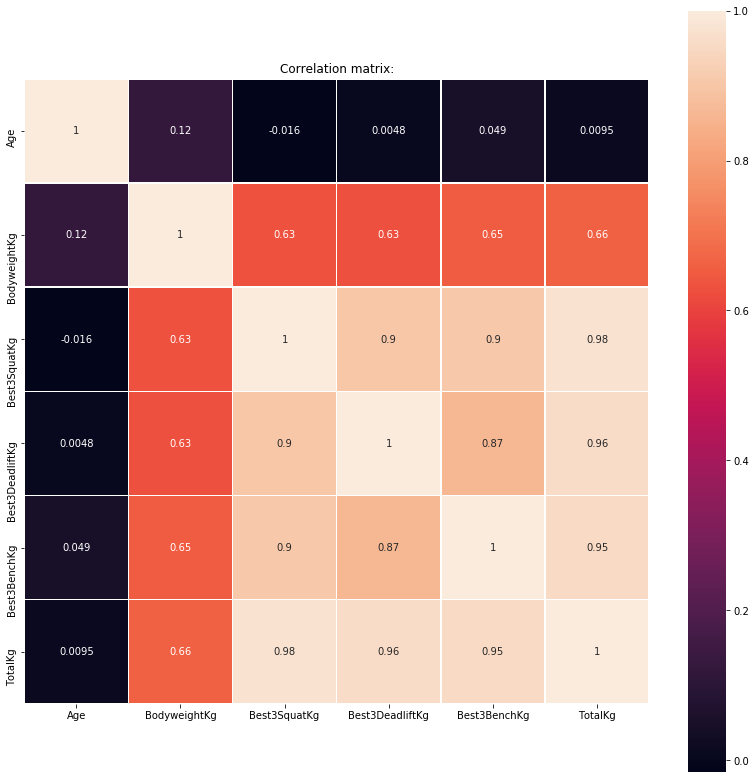

In [18]:
#matrix plot
fig=plt.figure(figsize=(14,14))
sns.heatmap(powerlifting_base.dropna().corr(), square = True, annot = True, linewidths = .5)
plt.title("Correlation matrix:")
plt.savefig("../extra visualizations/matrix.png")
plt.show()

In [19]:
#Linear Regression
#Collecting X and Y:
powerlifting_base = powerlifting_base.dropna()
X = powerlifting_base['Best3SquatKg'].values
Y = powerlifting_base['TotalKg'].values
#Mean X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)
#Total number of values
n = len(X)
#Using the formula to calculate m and c in y=m*x+c
numer = 0
demon = 0
for i in range(n):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    demon += (X[i] - mean_X) ** 2
m = numer / demon
c = mean_Y - (m * mean_X)

print('m = ', m)
print('c = ', c)

m =  2.4365005828349613
c =  55.898045631029504


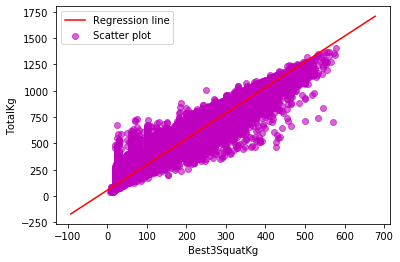

In [20]:
#visualize
max_x = np.max(X) + 100
min_x = np.min(X) - 100
#Calculating line values x and y
xx = np.linspace(min_x, max_x)
yy = m * xx + c
#Ploting line
plt.plot(xx, yy, color = 'r', label = 'Regression line')

#Ploting scatter points
plt.scatter(X, Y, color = 'm', label = 'Scatter plot',  alpha=0.6)

plt.xlabel('Best3SquatKg')
plt.ylabel('TotalKg')
plt.legend()
plt.savefig("../extra visualizations/regression.png")
plt.show()

In [21]:
#Linear regression with multiple features by using the SCIKIT-LEARN library
X = powerlifting_base.loc[:, ('Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg')] #independent features
Y = powerlifting_base.loc[:, 'TotalKg'] #dependent features
#Breakdown of data into 50% training and 50% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred

array([534.99929806, 309.99922415, 784.99851145, ..., 307.49925639,
       449.99926254, 329.99912239])

In [22]:
Y_test

593344     535.0
502376     310.0
1539286    785.0
517150     345.0
508642     490.0
           ...  
1438003    702.5
2010268    490.5
260526     307.5
559810     450.0
811115     330.0
Name: TotalKg, Length: 236534, dtype: float64

In [23]:
print('Accuracy:', reg.score(X_test, Y_test))

Accuracy: 0.9999999841350818


In [24]:
#eval the accuracy of the model using (MSE and MAE)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('mse: ', mse)
print('mae: ', mae)

mse:  0.0005235664625736628
mae:  0.002400064302823306


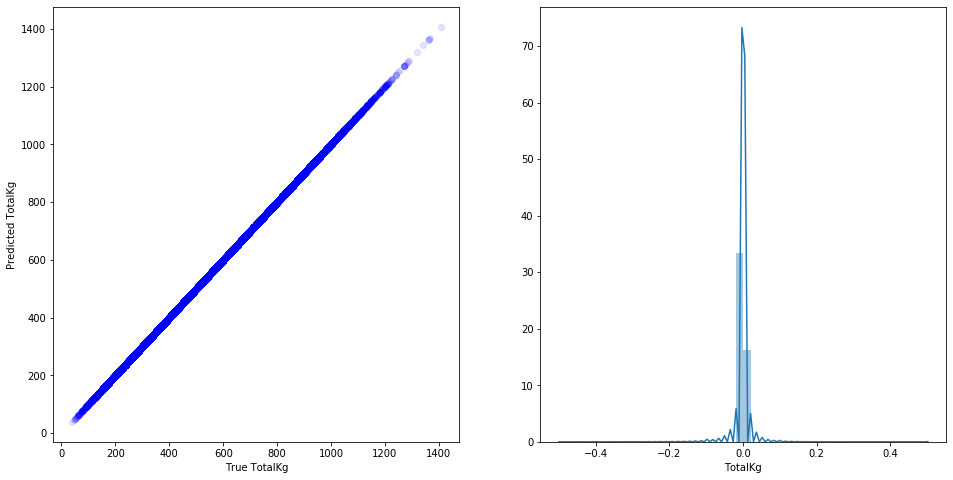

In [25]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("../extra visualizations/Predictive plot.png")


In [26]:
#Ridge regression with multiple features by using the SCIKIT-LEARN library
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
Y_pred


array([534.99929807, 309.99922424, 784.99851141, ..., 307.49925651,
       449.99926252, 329.9991225 ])

In [27]:
Y_test

593344     535.0
502376     310.0
1539286    785.0
517150     345.0
508642     490.0
           ...  
1438003    702.5
2010268    490.5
260526     307.5
559810     450.0
811115     330.0
Name: TotalKg, Length: 236534, dtype: float64

In [28]:
print('Accuracy: ', ridge.score(X_test, Y_test))

Accuracy:  0.9999999841350817


In [29]:
#eval the accuracy of the model using (MSE and MAE)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('mse: ', mse)
print('mae: ', mae)

mse:  0.0005235664645142249
mae:  0.0024000640718990556


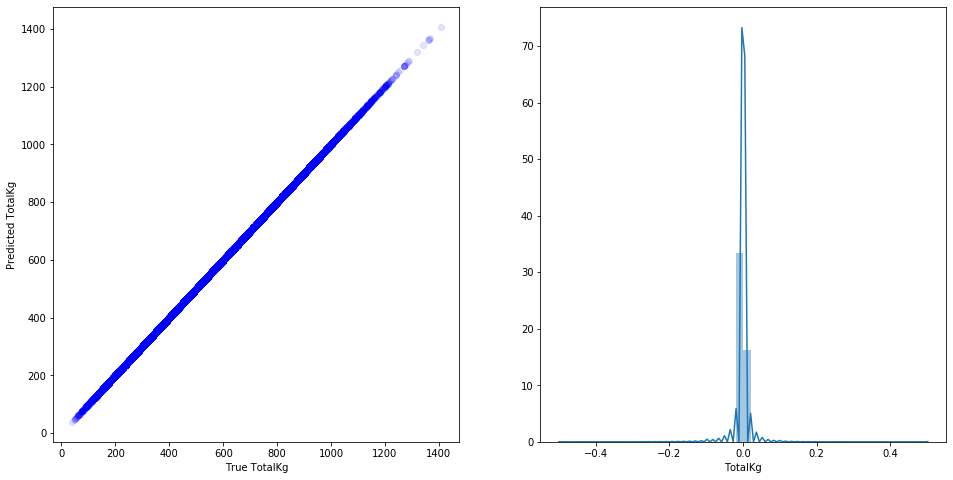

In [30]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("../extra visualizations/Predictive plot2.png")


In [31]:
#lasso
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
Y_pred

array([534.99426748, 310.02281227, 784.9692837 , ..., 307.52187968,
       450.00744974, 330.0203005 ])

In [32]:
Y_test

593344     535.0
502376     310.0
1539286    785.0
517150     345.0
508642     490.0
           ...  
1438003    702.5
2010268    490.5
260526     307.5
559810     450.0
811115     330.0
Name: TotalKg, Length: 236534, dtype: float64

In [33]:
print('Accuracy: ', lasso.score(X_test, Y_test))

Accuracy:  0.9999999715587778


In [34]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.0009386036491164421
mae:  0.018144219207167942


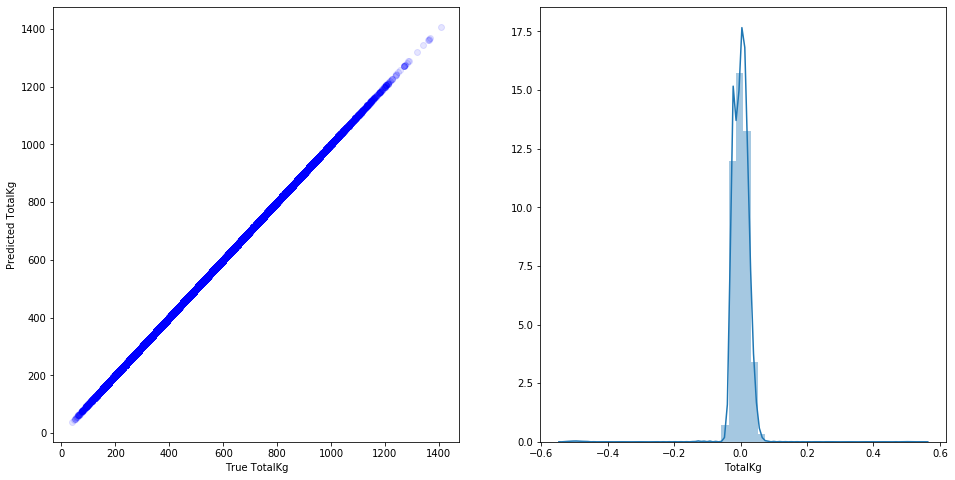

In [35]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("../extra visualizations/Predictive plot3.png")

In [36]:
#ElasticNet regression with multiple features by using the SCIKIT-LEARN library
from sklearn.linear_model import ElasticNet
elasticNet= ElasticNet().fit(X_train, Y_train)
Y_pred = elasticNet.predict(X_test)
Y_pred

array([534.994256  , 310.02282484, 784.96946062, ..., 307.5219258 ,
       450.00735154, 330.02037173])

In [37]:
Y_test

593344     535.0
502376     310.0
1539286    785.0
517150     345.0
508642     490.0
           ...  
1438003    702.5
2010268    490.5
260526     307.5
559810     450.0
811115     330.0
Name: TotalKg, Length: 236534, dtype: float64

In [38]:
print('Accuracy: ', lasso.score(X_test, Y_test))

Accuracy:  0.9999999715587778


In [39]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.0009375685232583683
mae:  0.018129887160641064


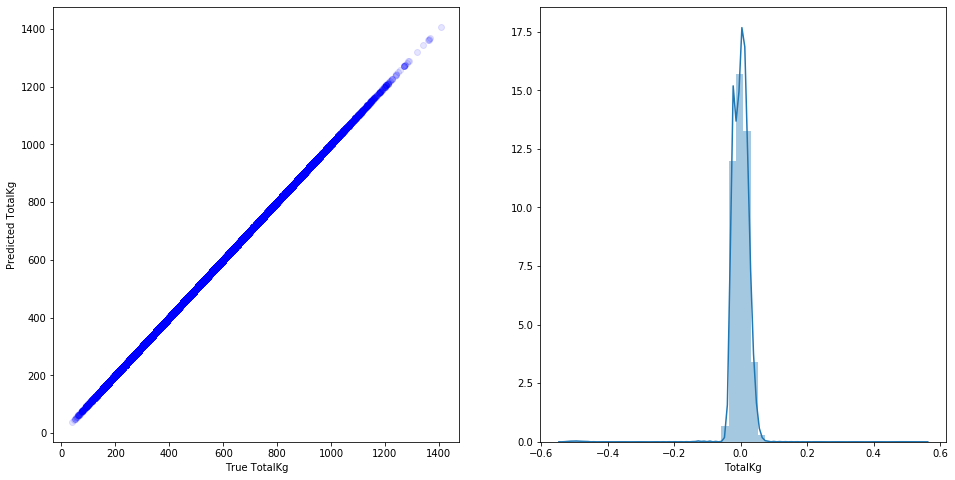

In [40]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("../extra visualizations/Predictive plot4.png")

In [41]:
from sklearn.ensemble import VotingRegressor
votingReg=VotingRegressor([('liReg',reg),('Lasso',lasso),('Ridge',ridge),('ElasticNet',elasticNet)]).fit(X_train, Y_train)
Y_pred = votingReg.predict(X_test)
Y_pred

array([534.9967799 , 310.01102138, 784.98394179, ..., 307.5105796 ,
       450.00333159, 330.00972928])

In [42]:
Y_test

593344     535.0
502376     310.0
1539286    785.0
517150     345.0
508642     490.0
           ...  
1438003    702.5
2010268    490.5
260526     307.5
559810     450.0
811115     330.0
Name: TotalKg, Length: 236534, dtype: float64

In [43]:
print('Accuracy: ', votingReg.score(X_test, Y_test))

Accuracy:  0.9999999809754435


In [44]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.0006278393385810998
mae:  0.009827323076369106


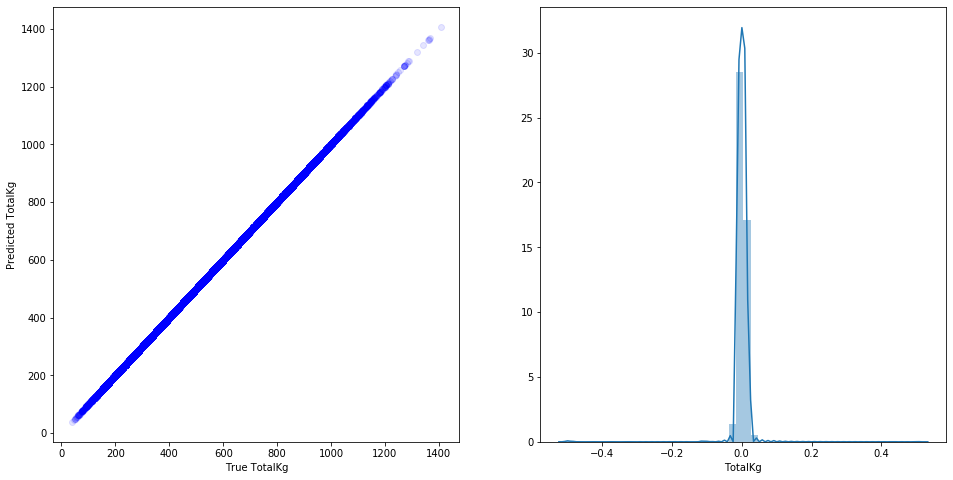

In [45]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("../extra visualizations/Predictive plot5.png")

In [46]:
#read CSV
#csv_path = os.path.join("..", "Resources", "openpowerlifting-2020-09-06.csv")
#lifters_df = pd.read_csv(csv_path)
#print(type(lifters_df))
lifters_df = powerlifting_base
#lift_df = pd.read_csv(csv_path, index_col="Name")

In [47]:
lifters_df.reset_index(inplace=True, drop=True)
lifters_df.head(500000)

,Equipment,Age,Country,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3DeadliftKg,Best3BenchKg,TotalKg,Place,Sex
0,Wraps,24.0,USA,Open,110.0,110,288.03,317.51,163.29,768.84,1,M
1,Wraps,38.5,USA,Open,110.0,110,226.80,226.80,170.10,623.69,3,M
2,Wraps,27.0,USA,Open,75.0,75,138.35,142.88,65.77,347.00,1,F
3,Wraps,34.5,USA,Open,75.0,75,83.91,104.33,49.90,238.14,2,F
4,Raw,32.5,Portugal,Open,66.8,67.5,130.00,195.00,60.00,385.00,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...
473062,Raw,19.5,Finland,Open,103.8,105,220.00,220.00,135.00,575.00,6,M
473063,Raw,20.5,Finland,Open,87.5,105,200.00,230.00,130.00,560.00,8,M
473064,Raw,24.5,Finland,Open,94.5,105,285.00,310.00,200.00,795.00,1,M
473065,Raw,28.5,Finland,Open,92.6,105,260.00,295.00,180.00,735.00,2,M


In [48]:
#create html tbale
html_table = lifters_df.to_html()
len(html_table)

135745152

In [49]:
#write html table to text
lifters_df.to_html('table.html')